<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/master/02_AlgebraLineal/07_SistemasLineales/09_FactorizacionQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factorización QR
### Proyecto PAPIME PE101019
- Autor: Miguel Angel Pérez León
- Rev: dom nov 22 17:08:27 CDT 2020

## Introducción

Como ya se ha visto a lo largo de este curso, es recurrente tratar de resolver un sistema del tipo $A\vec{x}=\vec{b}$ y dado que el cálculo de la matriz inversa de $A$ es un proceso costoso, se buscan alternativas.

La matriz asociada al **sistema de ecuaciones normales** $\left(A^{T}A\right)$, tiene peculiares características (**Simétrica y Positiva Definida**) que la convierte en candidato a diferentes tipos de factorizaciones, en este caso la factorización $QR$.

Hecho. Una matriz $A\in M_{n\times n}$ sobre $\mathbb{R}$
1.   Es simétrica si: $A=A^{T}$
2.   Es positiva definida si: Todos sus determinantes superiores izquierdos de $i\times i\quad i=1,\ldots,n$ son positivos.

## Teorema

Sea $A\in M_{m\times n}$ sobre $\mathbb{R}$, $(m\geq n)$ y rango$\left(A\right)=n$ existe una única factorización $QR$ tal que
$$A=QR\quad con\,r_{ii}>0\quad i=0,\ldots,n-1$$

## Método de Gram-Schmidt para la factorización $A=QR$

La idea detrás de la factorización $QR$ es construir una base ortonormal $\left(q_{1},q_{2},\ldots,q_{n}\in \mathbb{R}^{n}\right)$ para el subespacio generado por los vectores columna de $A$. El que 2 vectores sean ortogonales, significa que el **producto punto entre ellos es igual a cero** (el ángulo entre ellos es 90 grados) y si además un vector esta dividido entre la norma de si mismo, **ese vector esta normalizado**.

*   Se comienza utilizando el primer vector columna de $A\,(a_{1})$. Es decir $q_{1}=\frac{a_{1}}{\left\Vert a_{1}\right\Vert}$.
*   A continuación se substrae del vector $a_{2}$ su coeficiente en la dirección de $q_{1}$, es decir $\left(q_{1}^{T}\cdot a_{1}\right)\cdot q_{1}$. Dando como resultado un vector $q_{2}$, que es ortogonal a $q_{1}$. Finalmente se normaliza el vector $q_{2}$ para volverlo ortonormal.
*   El proceso se repite con el resto de los vectores columna de 
$$A=\left[a_{1},a_{2},\ldots,a_{n}\right]$$

Un par de vectores ortonormales se verían de la siguiente forma.

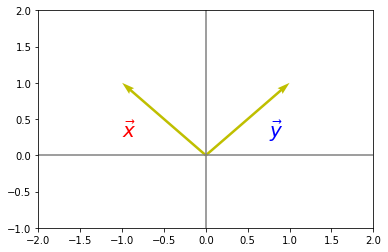

1.0
1.0
0


In [ ]:
# biblioteca para calculos numericos
import numpy as np
# biblioteca para graficar
import matplotlib.pyplot as plt

# vectores x y y a graficar
x = [0,0,-1,1]
y = [0,0,1,1]

# se grafica cada una de las componentes de los vectores
plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1, color='y')

# limites de la grafica
plt.xlim(-2, 2)
plt.ylim(-1, 2)
# ejes cartesianos
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
# etiquetas en la grafica
plt.text(-1, 0.25, r'$\vec{x}$', size=20, color='r')
plt.text(0.75, 0.25, r'$\vec{y}$', size=20, color='b')
# se muestra la grafica
plt.show()

# se definen ambos vectores
x = np.array([-1,1])
y = np.array([1,1])
# calculamos la norma 1 del vector x
print(np.linalg.norm(x,np.inf))
# calculamos la norma 1 del vector y
print(np.linalg.norm(y,np.inf))
# prducto punto entre ambos vectores
print(np.dot(x,y))

### Algoritmo

En términos matemáticos, el proceso se vería de la siguiente manera.

1.   $q_{1}=\frac{v_{1}}{\left\Vert v_{1}\right\Vert}\quad con\quad v_{1}=a_{1}$
2.   $q_{2}=\frac{v_{2}}{\left\Vert v_{2}\right\Vert}\quad con\quad v_{2}=a_{2}-\left(q_{1}^{T}\cdot a_{2}\right)\cdot q_{1}$
3.   $q_{3}=\frac{v_{3}}{\left\Vert v_{3}\right\Vert}\quad con\quad v_{3}=a_{3}-\left(q_{1}^{T}\cdot a_{3}\right)\cdot q_{1}-\left(q_{2}^{T}\cdot a_{3}\right)\cdot q_{2}$
4.   En general el j-esimo paso, suponiendo conocidos $q_{1},\ldots,q_{j-1}$, es un vector $q_{j}$ ortonormal a todos los vectores ya conocidos, es decir
$$q_{j}	=	\frac{v_{j}}{\left\Vert v_{j}\right\Vert}\quad con\quad v_{j}=a_{j}-\left(q_{1}^{T}\cdot a_{j}\right)\cdot q_{1}-\cdots-\left(q_{j-1}^{T}\cdot a_{j}\right)\cdot q_{j-1}$$
5.   En forma de sumatoria, el vector $v_{j}$ se ve de la siguiente manera
$$v_{j}=a_{j}-\sum_{i=1}^{j-1}\left(q_{i}^{T}\cdot a_{j}\right)\cdot q_{i}$$





### Ejemplo

Sea $A=\left(\begin{array}{ccc}
-1 & -1 & 1\\
1 & 3 & 3\\
-1 & -1 & 5\\
1 & 3 & 7
\end{array}\right)$ encuentre su factorización $A=QR$, empleando las norma euclidiana $\left\Vert \cdot \right\Vert_{2}$.

$q_{1}=\frac{v_{1}}{\left\Vert v_{1}\right\Vert _{2}}\quad v_{1}=a_{1}=\left(\begin{array}{c}
-1\\
1\\
-1\\
1
\end{array}\right)\quad{\color{red}r}_{\color{red}{11}}=\left\Vert v_{1}\right\Vert _{2}=2\Longrightarrow{\color{red}q_{\color{red}{1}}=\frac{v_{1}}{r_{11}}=\left(\begin{array}{c}
-\frac{1}{2}\\
\frac{1}{2}\\
-\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)}\quad{\color{red}r}_{\color{red}{12}}=q_{1}^{T}a_{2}=4$

$$v_{2}=a_{2}-r_{12}q_{1}=\left(\begin{array}{c}
-1\\
3\\
-1\\
3
\end{array}\right)-4\left(\begin{array}{c}
-\frac{1}{2}\\
\frac{1}{2}\\
-\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)=\left(\begin{array}{c}
1\\
1\\
1\\
1
\end{array}\right)$$

$${\color{red}r}_{\color{red}{22}}=\left\Vert v_{2}\right\Vert _{2}=2\Longrightarrow{\color{red}q_{\color{red}{2}}=\frac{v_{2}}{r_{22}}=\left(\begin{array}{c}
\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)}$$

$${\color{red}r}_{\color{red}{13}}=q_{1}^{T}a_{3}=2\  \ {\color{red}r}_{\color{red}{23}}=q_{2}^{T}a_{3}=8$$

$$v_{3}=a_{3}-r_{13}q_{1}-r_{23}q_{2}=\left(\begin{array}{c}
1\\
3\\
5\\
7
\end{array}\right)-2\left(\begin{array}{c}
-\frac{1}{2}\\
\frac{1}{2}\\
-\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)-8\left(\begin{array}{c}
\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)=\left(\begin{array}{c}
-2\\
-2\\
2\\
2
\end{array}\right)$$

$${\color{red}r}_{\color{red}{33}}=\left\Vert v_{3}\right\Vert _{2}=4\Longrightarrow{\color{red}q_{\color{red}{3}}=\frac{v_{2}}{r_{33}}=\left(\begin{array}{c}
-\frac{1}{2}\\
-\frac{1}{2}\\
\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)}$$

$$A=\left(\begin{array}{ccc}
-1 & -1 & 1\\
1 & 3 & 3\\
-1 & -1 & 5\\
1 & 3 & 7
\end{array}\right)=\left(\begin{array}{ccc}
q_{1} & q_{2} & q_{3}\end{array}\right)\left(\begin{array}{ccc}
r_{11} & r_{12} & r_{13}\\
0 & r_{22} & r_{23}\\
0 & 0 & r_{33}
\end{array}\right)$$

$$\left(\begin{array}{ccc}
-1 & -1 & 1\\
1 & 3 & 3\\
-1 & -1 & 5\\
1 & 3 & 7
\end{array}\right)=\left(\begin{array}{ccc}
-\frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\\
\frac{1}{2} & \frac{1}{2} & -\frac{1}{2}\\
-\frac{1}{2} & \frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} & \frac{1}{2} & \frac{1}{2}
\end{array}\right)\left(\begin{array}{ccc}
2 & 4 & 2\\
0 & 2 & 8\\
0 & 0 & 4
\end{array}\right)$$

In [ ]:
import numpy as np

# matriz a que se quiere aplicar factorizacion QR
A = np.array([[-1,-1,1],[1,3,3],[-1,-1,5],[1,3,7]])

# funcion de numpy encargada de la factorizacion QR
Q,R = np.linalg.qr(A)

# mostrar ambas matrices
print(Q)
print(R)

# comprobacion
print(np.matmul(Q,R))

[[-0.5 -0.5  0.5]
 [ 0.5 -0.5  0.5]
 [-0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5]]
[[ 2.  4.  2.]
 [ 0. -2. -8.]
 [ 0.  0. -4.]]
[[-1. -1.  1.]
 [ 1.  3.  3.]
 [-1. -1.  5.]
 [ 1.  3.  7.]]


## Propiedades de la factorización QR

La factorización $QR$ implica que la matriz $Q$ es una matriz ortonormal y la matriz $R$ es una matriz triangular superior. Estos factores tiene muchas ventajas, sea $A\in M_{n\times n}$ sobre $\mathbb{R}$.

1.  Si $Q$ es ortogonal entonces $Q^{T}Q=Id.$
2.  $QR=A\Longrightarrow R=Q^{T}A.$
3.  Dado que de las ecuaciones normales definidas por $A^{T}A\vec{x}=A^{T}\vec{b}$, garantizan que $A^{T}A$ es una matriz positiva definida, entonces $A^{T}A$ se pude factorizar en $QR$.
4.  Sea $A'=A^{T}A\;y\;b'=A^{T}\vec{b}.$ Entonces $A'\vec{x}=b'\Longrightarrow QR\vec{x}=b'\Longrightarrow Q^{T}QR\vec{x}=Q^{T}b'\Longrightarrow$
$$R\vec{x}=Q^{T}b'$$
Resulta que $R\vec{x}=Q^{T}b'$ es un sistema triangular que puede ser resuelto fácilmente mediante su buen amigo, **substitución hacia atrás**. 




## Referencias

*   Riswan Butt, Numerical Analysys Using Matlab, Jones and Bartlett.
*   Ward Cheney, David Kincaid, Métodos Numéricos y Computación, Cenage Learning.
*   Justin Solomon, Numerical Algorithms.
*   Jaan Kiusalaas, Numerical Methods in Engineering with Python.
*   Richard L. Burden, J. Douglas Faires, Análisis Numérico, Math Learning.
*   Yuri N. Skiba: Introducción a los Métodos Numéricos. 